`image_segmentation` package from https://github.com/divamgupta/image-segmentation-keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras_segmentation
%matplotlib inline

In [3]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
IMG_CHANNELS = 4
NUM_CLASSES = 2
NUM_EPOCHS = 1

In [4]:
root_dir = '/home/jovyan/ghw2019_planetpieces/contributors/claire/unet-model-claire/data'
train_path = os.path.join(root_dir, 'train')
test_path = os.path.join(root_dir, 'test')
check_path = os.path.join(root_dir, 'checkpoint')
out_path = os.path.join(root_dir, 'out')

In [5]:
%%capture
model = keras_segmentation.models.unet.vgg_unet(n_classes=NUM_CLASSES,
                                                input_height=IMG_HEIGHT,
                                                input_width=IMG_WIDTH)

In [31]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 64, 64, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 64, 64, 64)   36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 32, 32, 64)   0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [6]:
model.train( 
    train_images = os.path.join(train_path, "image/"),
    train_annotations = os.path.join(train_path, "label/"),
    checkpoints_path = "vgg_unet_1",
    epochs=NUM_EPOCHS
)

  0%|          | 0/8 [00:00<?, ?it/s]

Verifying train dataset


100%|██████████| 8/8 [00:36<00:00,  4.55s/it]

Dataset verified! 
Starting Epoch  0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
512/512 [==============================] - 4608s 9s/step - loss: 0.0270 - acc: 0.9930
saved  vgg_unet_1.model.0
Finished Epoch 0


In [10]:
out = model.predict_segmentation(
    inp=os.path.join(test_path, "image/703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.png"),
    out_fname=os.path.join(out_path, "out.png")
)

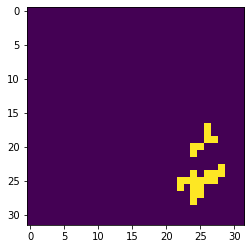

In [11]:
plt.imshow(out)

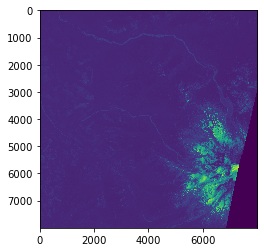

In [30]:
file = os.path.join(test_path, "image/703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.png")
img = mpimg.imread(file)
img = img[:,:,0]
imgplot = plt.imshow(img)